<a href="https://colab.research.google.com/github/taylorp-j/NGG6050/blob/main/9_30_24_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Plot the relationship between Age and Wing Length.

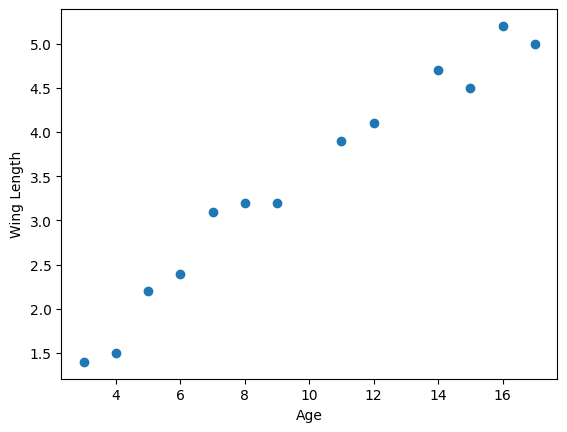

In [2]:
import matplotlib.pyplot as plt

# Sample data
x = [3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17]
y = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0]

# Create a scatter plot
plt.scatter(x, y)

# Adding titles and labels
plt.xlabel('Age')
plt.ylabel('Wing Length')

# Show plot
plt.show()

2. Calculate and plot the regression line.

b: 0.26468412066021585
a: 0.8296243597040454


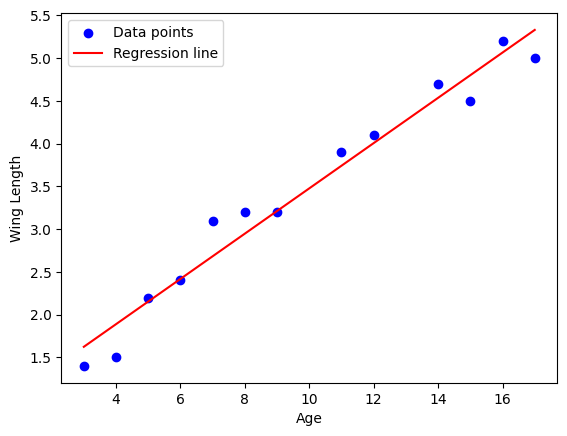

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample data
x = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
y = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Number of data points
N = len(x)

# Calculating the necessary sums
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x**2)

# Calculating the slope (b)
slope = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)

print(f"b: {slope}")

# Calculating the y-intercept (a)
y_intercept = (sum_y - slope * sum_x) / N
print(f"a: {y_intercept}")

# Plotting the scatter plot and regression line
y_pred = slope * x + y_intercept
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()

# Show the plot
plt.show()

3. Can you reject Ho: b = 0?

In [5]:
import scipy.stats as stats

# Calculating residuals and standard error
y_pred = slope * x + y_intercept
residuals = y - y_pred
s = np.sqrt(np.sum(residuals**2) / (N - 2))

# Standard error of the slope
SE_b = s / np.sqrt(np.sum((x - np.mean(x))**2))

# Calculate t-statistic and p-value
t = slope / SE_b
p_value = 2 * (1 - stats.t.cdf(np.abs(t), df=N - 2))

print(f"P-value for slope (b): {p_value}")

# Decision
alpha = 0.05
decision = "Reject the null hypothesis: b ≠ 0" if p_value < alpha else "Fail to reject the null hypothesis: b = 0"
print(decision)

P-value for slope (b): 3.0097431213960135e-09
Reject the null hypothesis: b ≠ 0


4. Calculate and plot the confidence intervals on the slope of the regression.

Slope: 0.26468412066021585, Confidence Interval: (0.23043927955854387, 0.2989289617618878)
Y-intercept: 0.8296243597040454, Confidence Interval: (0.46042944415431836, 1.1988192752537723)


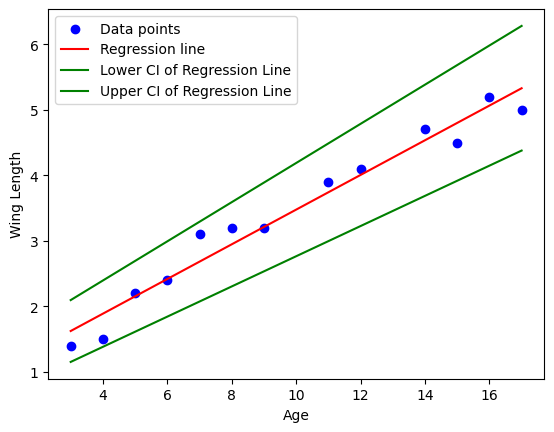

In [9]:
# Standard error of the slope (m)
SE_b = s / np.sqrt(np.sum((x - np.mean(x))**2))

# Standard error of the y-intercept (b)
SE_a = s * np.sqrt(1/N + (np.mean(x)**2) / np.sum((x - np.mean(x))**2))

# Calculate t-value for 95% confidence interval
alpha = 0.05
t_value = stats.t.ppf(1 - alpha/2, df=N - 2)

# Calculate confidence intervals
CI_bmin = (slope - t_value * SE_b)
CI_bmax = (slope + t_value * SE_b)
CI_b = (CI_bmin, CI_bmax)
CI_amin = (y_intercept - t_value * SE_a)
CI_amax = (y_intercept + t_value * SE_a)
CI_a = (CI_amin, CI_amax)

# Output results
print(f"Slope: {slope}, Confidence Interval: {CI_b}")
print(f"Y-intercept: {y_intercept}, Confidence Interval: {CI_a}")

#Regression Line and CI of Regression Line Equations
y_pred = slope * x + y_intercept
y_min = CI_bmin * x + CI_amin
y_max = CI_bmax * x + CI_amax

#Plot Results
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression line')
plt.plot(x, y_min, color='green', label='Lower CI of Regression Line')
plt.plot(x, y_max, color='green', label='Upper CI of Regression Line')

plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()

4. Calculate r^2 (the coefficient of determination)

In [10]:
# Calculate mean of observed values
mean_y = np.mean(y)

# Calculate Total Sum of Squares (SS_tot)
SS_tot = np.sum((y - mean_y)**2)

# Calculate Residual Sum of Squares (SS_res)
SS_res = np.sum((y - y_pred)**2)

# Calculate R^2
R_squared = 1 - (SS_res / SS_tot)

print(f"Coefficient of Determination (R^2): {R_squared}")

Coefficient of Determination (R^2): 0.9633822518042856


6. Calculate Pearson's r.

In [13]:
# Number of data points
n = len(x)

# Calculate sums
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x**2)
sum_y_squared = np.sum(y**2)

# Calculate Pearson's r
numerator = n * sum_xy - sum_x * sum_y
denominator = np.sqrt((n * sum_x_squared - sum_x**2) * (n * sum_y_squared - sum_y**2))
r = numerator / denominator

print(f"Pearson's correlation coefficient (r): {r}")

# Optional: Calculate using scipy
r_scipy, _ = stats.pearsonr(x, y)
print(f"Pearson's r using scipy: {r_scipy}")

Pearson's correlation coefficient (r): 0.9815203776816274
Pearson's r using scipy: 0.981520377681628


7. Add some noise to the data and see how the regression changes.

Slope: 0.20956375048576353
Y-intercept: 2.117306938374402
Coefficient of Determination (R^2): 0.1720233409707852
Pearson's correlation coefficient (r): 0.7376547484511002


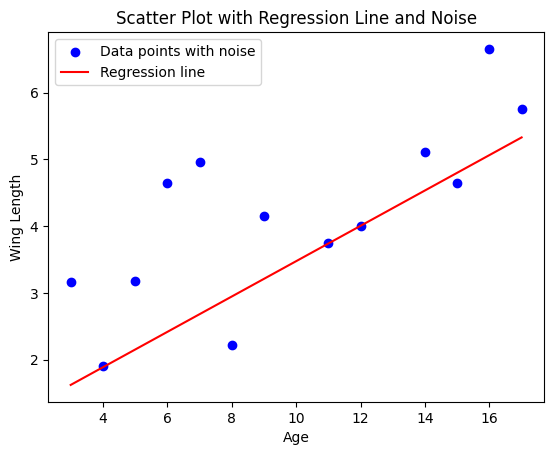

In [18]:
# Original data
x = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
y = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add noise
np.random.seed(0)  # For reproducibility
noise = np.random.normal(0, 1, size=y.shape)
y_noisy = y + noise

# Number of data points
N = len(x)

# Calculate necessary sums
sum_x = np.sum(x)
sum_y = np.sum(y_noisy)
sum_xy = np.sum(x * y_noisy)
sum_x_squared = np.sum(x**2)

# Calculating slope (m) and y-intercept (b)
denominator = (N * sum_x_squared - sum_x**2)
slope = (N * sum_xy - sum_x * sum_y) / denominator
y_intercept = (sum_y - slope * sum_x) / N


# Calculate mean of observed values
mean_y = np.mean(y_noisy)

# Calculate Total Sum of Squares (SS_tot)
SS_tot = np.sum((y_noisy - mean_y)**2)

# Calculate Residual Sum of Squares (SS_res)
SS_res = np.sum((y_noisy - y_pred)**2)

# Calculate R^2
R_squared = 1 - (SS_res / SS_tot)

# Calculate Pearson's r
n = len(x)
numerator = n * sum_xy - sum_x * sum_y
denominator = np.sqrt((n * sum_x_squared - sum_x**2) * (n * np.sum(y_noisy**2) - sum_y**2))
r = numerator / denominator

# Output results
print(f"Slope: {slope}")
print(f"Y-intercept: {y_intercept}")
print(f"Coefficient of Determination (R^2): {R_squared}")
print(f"Pearson's correlation coefficient (r): {r}")

# Plotting the scatter plot and regression line
plt.scatter(x, y_noisy, color='blue', label='Data points with noise')
plt.plot(x, y_pred, color='red', label='Regression line')

# Adding titles and labels
plt.title('Scatter Plot with Regression Line and Noise')
plt.xlabel('Age')
plt.ylabel('Wing Length')
plt.legend()
plt.show()
